In [11]:
# import dependencies
import pandas as pd

In [12]:
# read in csv
# set index to 'Date'
# set 'Date' to datetime
df = pd.read_csv('resources/S&P 500 Index Data 1927 - 2020.csv',
                index_col= 'Date',
                parse_dates= True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0
1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0
1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0
1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0
1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0


In [13]:
# keep only the 'Close' column
# use .info() to explore dataframe
# drop any nulls
sp500_df = df[['Close']].dropna()
sp500_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 23323 entries, 1927-12-30 to 2020-11-04
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   23323 non-null  float64
dtypes: float64(1)
memory usage: 364.4 KB


<Axes: xlabel='Date'>

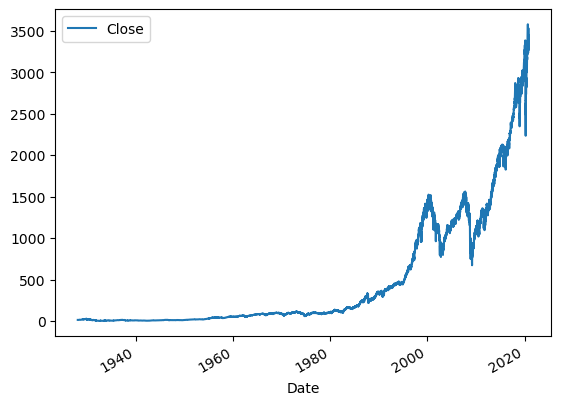

In [14]:
sp500_df.plot()

In [15]:
# drop columns 'Open', 'High', 'Low', 'Volume'
sp500_df = df.drop(columns= ['Open', 'High', 'Low', 'Volume', 'Adj Close']).dropna()
sp500_df.head()

,Close
Date,
1927-12-30,17.660000
1928-01-03,17.760000
1928-01-04,17.719999
1928-01-05,17.549999
1928-01-06,17.660000


In [16]:
# take the average of the 'Close' column by month
monthly_average = sp500_df.groupby(sp500_df.index.to_period('M')).mean()
monthly_average.head()

,Close
Date,
1927-12,17.660000
1928-01,17.520000
1928-02,17.324211
1928-03,18.233182
1928-04,19.371000


In [17]:
# change the index to a datetime
monthly_average.index = monthly_average.index.to_timestamp()
monthly_average.head()

,Close
Date,
1927-12-01,17.660000
1928-01-01,17.520000
1928-02-01,17.324211
1928-03-01,18.233182
1928-04-01,19.371000


In [18]:
# Create a column for month
monthly_average['Month'] = monthly_average.index.month
monthly_average.head()

,Close,Month
Date,,
1927-12-01,17.660000,12
1928-01-01,17.520000,1
1928-02-01,17.324211,2
1928-03-01,18.233182,3
1928-04-01,19.371000,4


In [19]:
# Create a column for year
monthly_average['Year'] = monthly_average.index.year
monthly_average.head()

,Close,Month,Year
Date,,,
1927-12-01,17.660000,12,1927
1928-01-01,17.520000,1,1928
1928-02-01,17.324211,2,1928
1928-03-01,18.233182,3,1928
1928-04-01,19.371000,4,1928


In [20]:
# Move the 'Year' and 'Month' columns to the front
cols = monthly_average.columns.tolist()
cols = cols[-2:] + cols[:-2]
monthly_average = monthly_average[cols]
monthly_average.head()

,Month,Year,Close
Date,,,
1927-12-01,12,1927,17.660000
1928-01-01,1,1928,17.520000
1928-02-01,2,1928,17.324211
1928-03-01,3,1928,18.233182
1928-04-01,4,1928,19.371000
